In [ ]:
!wget https://www.physi.uni-heidelberg.de/~dittmeier/pytorch/notebooks/data.csv
!wget https://www.physi.uni-heidelberg.de/~dittmeier/pytorch/notebooks/testdata.csv
!wget https://www.physi.uni-heidelberg.de/~dittmeier/pytorch/notebooks/data_noise0.csv
!wget https://www.physi.uni-heidelberg.de/~dittmeier/pytorch/notebooks/data_noise1
!wget https://www.physi.uni-heidelberg.de/~dittmeier/pytorch/notebooks/testdata_noise0.csv
!wget https://www.physi.uni-heidelberg.de/~dittmeier/pytorch/notebooks/testdata_noise10.csv
!wget https://www.physi.uni-heidelberg.de/~dittmeier/pytorch/solutions/coefficients.csv


--2024-04-09 07:06:05--  https://www.physi.uni-heidelberg.de/~dittmeier/pytorch/notebooks/data.csv
Resolving www.physi.uni-heidelberg.de (www.physi.uni-heidelberg.de)... 147.142.19.243
Connecting to www.physi.uni-heidelberg.de (www.physi.uni-heidelberg.de)|147.142.19.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1044965 (1020K) [text/csv]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1020K  1.59MB/s    in 0.6s    

2024-04-09 07:06:07 (1.59 MB/s) - ‘data.csv.1’ saved [1044965/1044965]

--2024-04-09 07:06:08--  https://www.physi.uni-heidelberg.de/~dittmeier/pytorch/notebooks/testdata.csv
Resolving www.physi.uni-heidelberg.de (www.physi.uni-heidelberg.de)... 147.142.19.243
Connecting to www.physi.uni-heidelberg.de (www.physi.uni-heidelberg.de)|147.142.19.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104440 (102K) [text/csv]
Saving to: ‘testdata.csv.1’

testdata.csv.1      100%[===================>

In [ ]:
# Create a custom Pytorch data set
import numpy as np
import torch
from torch.utils.data import Dataset

class CustomRegressionDataset(Dataset):
    def __init__(self, filename, transform=None, target_transform=None):
        self.dataset = torch.from_numpy(np.loadtxt(filename, delimiter=',')).float()
        self.transform = transform
        self.target_transform = target_transform

    # The __len__ method returns the number of samples in our dataset.
    def __len__(self):
        return len(self.dataset)

    # The __getitem__ method loads and returns a sample from the dataset at the given index idx.
    def __getitem__(self, idx):
        x = self.dataset[idx, :-1]
        y = self.dataset[idx, -1]
        if self.transform:
            x = self.transform(x)
        if self.target_transform:
            y = self.target_transform(y)
        return x, y


In [ ]:
batch_size = 64
Ndims = 10

In [ ]:
from torch.utils.data import DataLoader

training_data = CustomRegressionDataset('data.csv')
test_data = CustomRegressionDataset('testdata.csv')
print(training_data[0])
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
for i in range(5):
    print(train_features[i], train_labels[i])


(tensor([-0.4760, -0.6826, -0.4437, -0.0814, -0.3580,  0.0368, -0.4761,  0.9522,
         0.4656, -0.7695]), tensor(0.0949))
Feature batch shape: torch.Size([64, 10])
Labels batch shape: torch.Size([64])
tensor([ 0.2510,  0.9516,  0.8008,  0.8445,  0.1904, -0.1535, -0.9249,  0.6084,
         0.9724,  0.1487]) tensor(-2.1807)
tensor([-0.0281,  0.2820,  0.3405, -0.3888, -0.5132, -0.0596, -0.9427,  0.7839,
        -0.5839,  0.4479]) tensor(-1.2846)
tensor([ 0.4911,  0.8954,  0.3568,  0.3084,  0.3370,  0.1465, -0.0504,  0.7465,
         0.4616,  0.5422]) tensor(-1.1551)
tensor([ 0.6582, -0.4517, -0.4808,  0.7452, -0.6079, -0.6389, -0.5792,  0.2933,
         0.7839,  0.3492]) tensor(-0.0174)
tensor([-0.5887, -0.8227,  0.1701,  0.0136,  0.1773,  0.9359,  0.0969, -0.4849,
         0.7493,  0.3786]) tensor(0.7273)


tensor([-3.5800e-01, -1.1355e-01, -7.0300e-04,  ..., -9.4545e-01,
         4.5537e-01,  1.8838e-01]) tensor([ 0.0949, -0.1703,  0.9156,  ..., -0.6960,  0.0691, -1.3922])


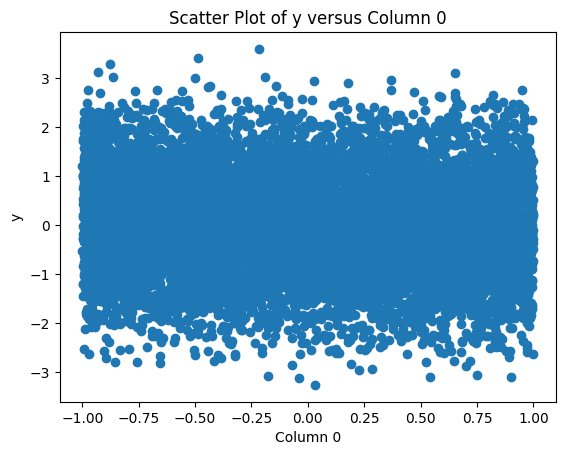

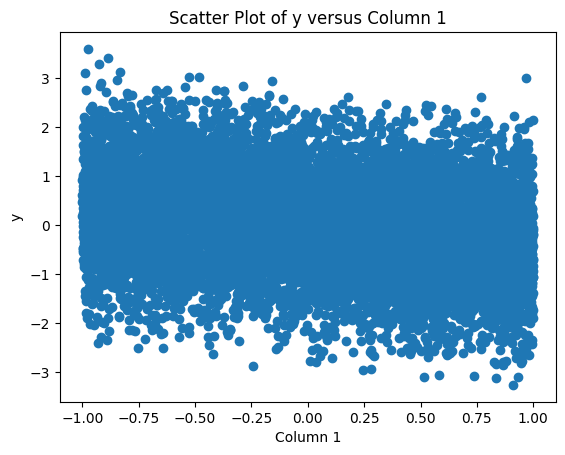

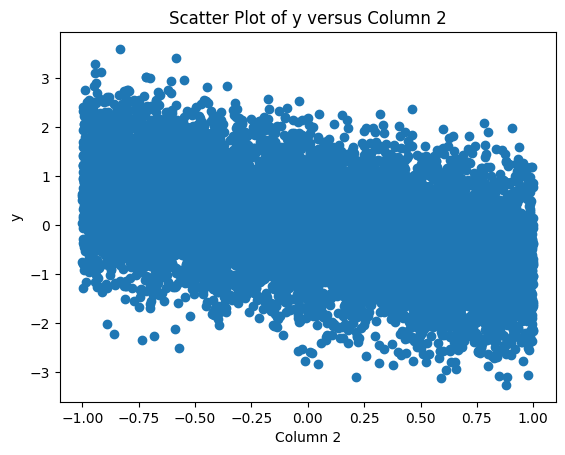

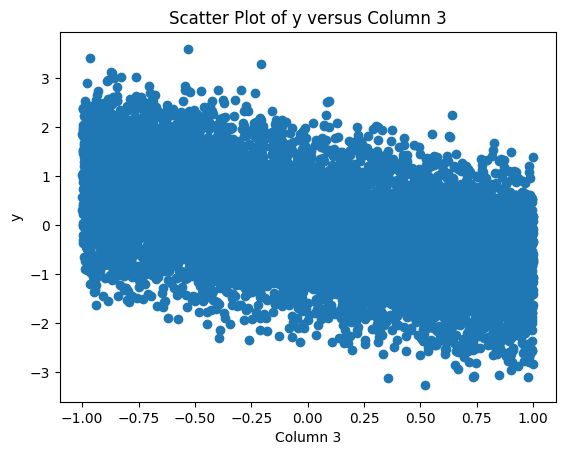

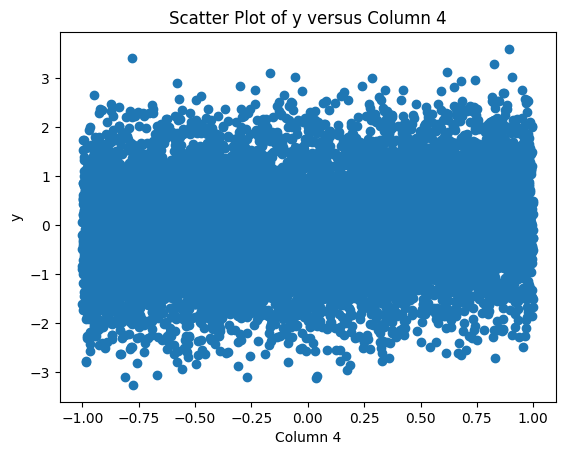

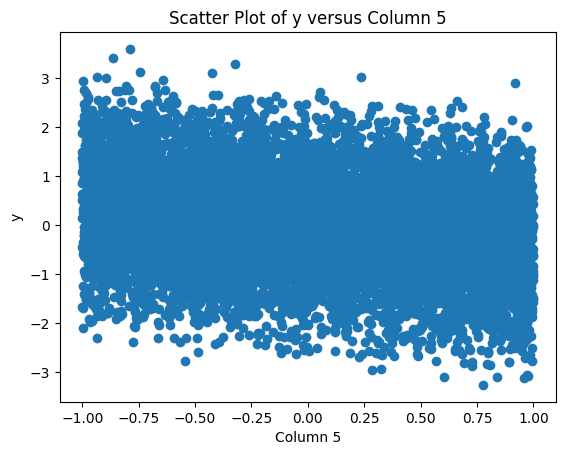

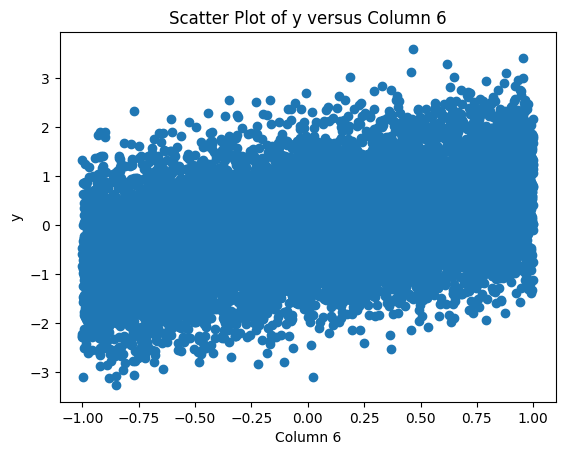

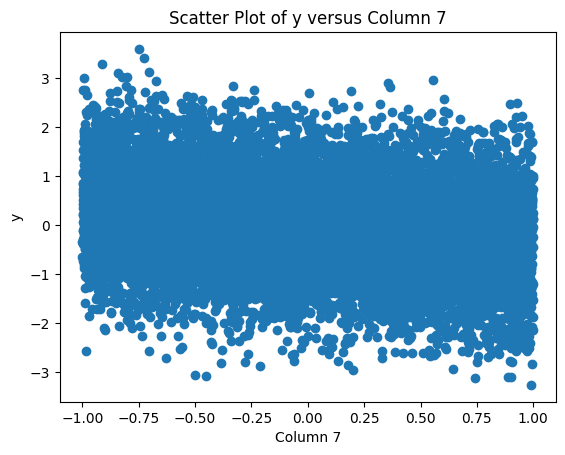

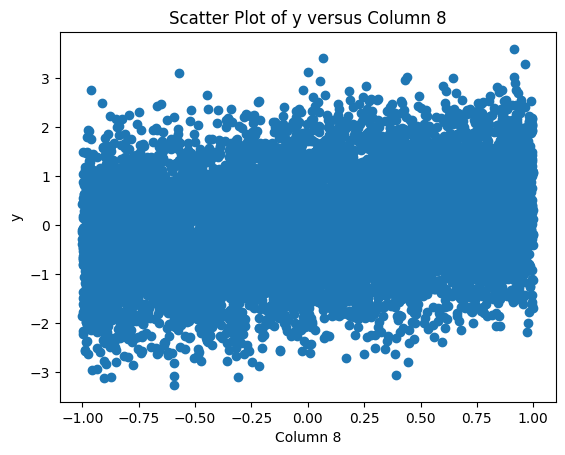

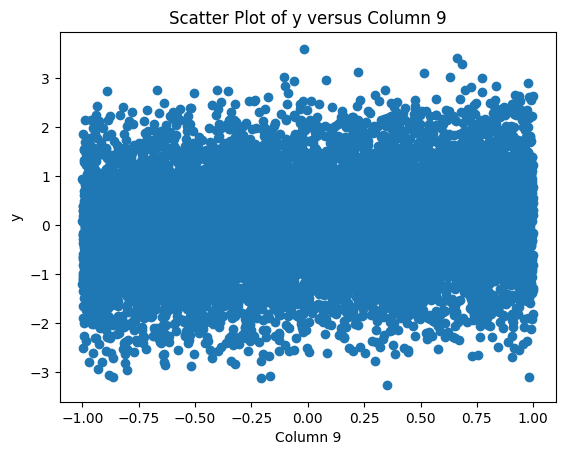

In [ ]:
import matplotlib.pyplot as plt

x,y = training_data[:]
print(x[:,i],y)

for i in range(Ndims):
    plt.scatter(x[:,i], y)
    plt.xlabel('Column {}'.format(i))
    plt.ylabel('y')
    plt.title('Scatter Plot of y versus Column {}'.format(i))
    plt.show()


In [ ]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(Ndims, 1, bias=False)

    def forward(self, x):
        y = self.linear(x)
        return y

model = NeuralNetwork()

In [ ]:
learning_rate = 1e-3
#batch_size = batch_size
epochs = 50

loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# loops over our optimization code
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X).squeeze()
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


In [ ]:
# evaluate the model's performance against the test dataset
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, sum_of_residuals = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X).squeeze()
            test_loss += loss_fn(pred, y).item()
            residuals = ((pred.squeeze()-y)**2).sum()
            sum_of_residuals += residuals

    test_loss /= num_batches
    sum_of_residuals /= size
    print(f"Test Error: \n sum_of_residuals: {sum_of_residuals:>6f}, Avg loss: {test_loss:>8f} \n")
    return test_loss

In [ ]:
test_loss = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loss.append(test_loop(test_dataloader, model, loss_fn))
print("Done!")


Epoch 1
-------------------------------
loss: 1.150640  [   64/10000]
loss: 1.018547  [ 6464/10000]
Test Error: 
 sum_of_residuals: 0.993967, Avg loss: 0.994125 

Epoch 2
-------------------------------
loss: 0.750055  [   64/10000]
loss: 0.767996  [ 6464/10000]
Test Error: 
 sum_of_residuals: 0.807549, Avg loss: 0.806284 

Epoch 3
-------------------------------
loss: 0.772430  [   64/10000]
loss: 0.697592  [ 6464/10000]
Test Error: 
 sum_of_residuals: 0.656485, Avg loss: 0.652321 

Epoch 4
-------------------------------
loss: 0.660843  [   64/10000]
loss: 0.682943  [ 6464/10000]
Test Error: 
 sum_of_residuals: 0.534190, Avg loss: 0.535881 

Epoch 5
-------------------------------
loss: 0.660214  [   64/10000]
loss: 0.426523  [ 6464/10000]
Test Error: 
 sum_of_residuals: 0.434787, Avg loss: 0.434226 

Epoch 6
-------------------------------
loss: 0.512418  [   64/10000]
loss: 0.423848  [ 6464/10000]
Test Error: 
 sum_of_residuals: 0.353751, Avg loss: 0.352508 

Epoch 7
--------------

Parameter name: linear.weight, Size: torch.Size([1, 10]), Values: Parameter containing:
tensor([[-0.1284, -0.4712, -0.8339, -0.9070,  0.2123, -0.4424,  0.7585, -0.3796,
          0.4704,  0.2552]], requires_grad=True)


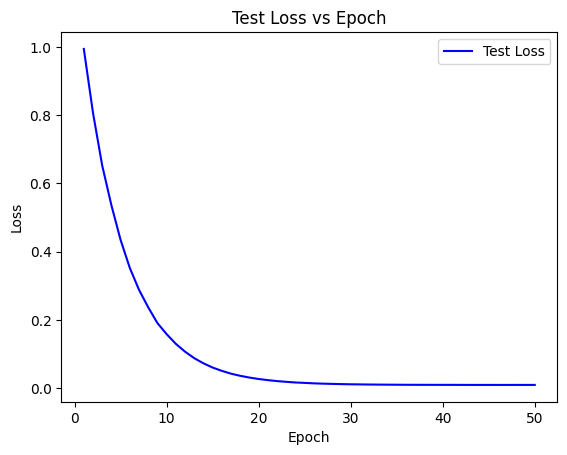

In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter name: {name}, Size: {param.size()}, Values: {param}")

import matplotlib.pyplot as plt
# Assuming you have the `test_loss` variable containing the loss values for each epoch
epochs = range(1, len(test_loss) + 1)
plt.plot(epochs, test_loss, 'b', label='Test Loss')
plt.title('Test Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


[-0.127845 -0.476452 -0.837859 -0.909038  0.214088 -0.445309  0.762877
 -0.3828    0.474454  0.257068]
[ 0.25327858  0.14809526  0.61242324  0.42663818  0.1742857  -0.88095183
 -0.34422696  0.75070337  0.99892381 -0.65751848] tensor([-0.8172], grad_fn=<SelectBackward0>)
[-0.5993792   0.58205873  0.82684566 -0.54265104  0.40000266  0.31320517
  0.03029209 -0.13380696  0.54392266  0.10913877] tensor([-0.0908], grad_fn=<SelectBackward0>)
[-0.01101016 -0.96187402 -0.39744851  0.35779097  0.14189383 -0.56564102
 -0.58079392  0.19259271  0.76222842  0.26907848] tensor([0.6555], grad_fn=<SelectBackward0>)
[-0.66280592  0.0490417  -0.84993642 -0.3315908   0.24546323  0.07724061
  0.50915912 -0.48826619  0.47657437 -0.47233466] tensor([1.7646], grad_fn=<SelectBackward0>)
[ 0.23463661  0.93530374  0.57851874  0.40880674  0.27711447  0.33498676
 -0.23428176  0.87813509  0.93453658  0.17611632] tensor([-1.4399], grad_fn=<SelectBackward0>)


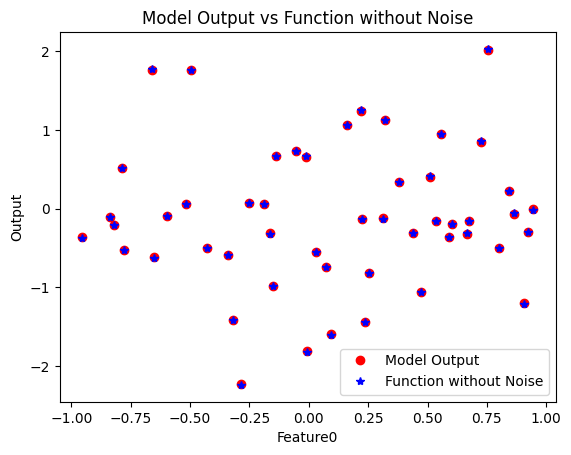

In [ ]:
array = np.random.uniform(-1,1,size=(50, Ndims))
model.eval()
output = model(torch.tensor(array).float())
function_without_noise = np.zeros(50)
coefficients = np.loadtxt('coefficients.csv', delimiter=',')
print(coefficients)
for i, x in enumerate(array):
    function_without_noise[i] = np.sum(coefficients*x)
#print(function_without_noise)
for i in range(5):
    print(array[i], output[i])
plt.plot(array[:,0], output.detach().numpy(), 'ro', label='Model Output')
plt.plot(array[:,0], function_without_noise, 'b*', label='Function without Noise')
plt.xlabel('Feature0')
plt.ylabel('Output')
plt.title('Model Output vs Function without Noise')
plt.legend()
plt.show()